## Outliers and predictions

In [1]:
### So from our previous files we saw the results of the predictions and the trend in the predictions 
### but there were few outliers last time, so in this file now this time, we will start to remove the outliers
### and then do the comparison
### (u-3std, u+3std) for the gausian distributions
### (Q1-1.5IQR, Q3 + 1.5IQR) if the distribution is left or right skewed, 
### for extreme outliers we take (3IQR) in a left or right skewed distribution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
import pylab

### loading the data

In [3]:
df_test = pd.read_csv('clean_test.csv')
df_test.head()

,Unnamed: 0,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,0,4,4,1.0,0,1,0,1,6,6,2019,17,30,4,25,10
1,1,3,3,1.0,1,0,0,1,12,5,2019,6,20,10,20,4
2,2,4,4,1.0,0,1,0,0,21,5,2019,19,15,19,0,23
3,3,4,4,1.0,0,0,1,1,21,5,2019,8,0,21,0,13
4,4,2,2,3.0,0,0,1,1,24,6,2019,23,55,2,45,2


In [4]:
df_test.shape

(2670, 16)

In [5]:
df_train = pd.read_csv('clean_train.csv')
df_train.head()

,Unnamed: 0,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2,3897.0
1,1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7,7662.0
2,2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19,13882.0
3,3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5,6218.0
4,4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4,13302.0


In [6]:
df_train.shape

(10681, 17)

### QQ plot template

In [7]:
def plot_graph_qq(df, feature) : 
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

### Clean_train data first

In [13]:
### for the categorical columns if they are label encoded or one hot, we never focus on removing outliers from them
### but when it comes to the numerical features even if they are our target feature(like price in that case), we do handle them

In [14]:
### in this particular dataset only price and duration columns are the ones where we need to work in order to handle the outliers

In [26]:
df_train_copy = pd.read_csv('clean_train.csv')
df_train_copy.fillna(1, inplace = True)

In [8]:
df_train.head()

,Unnamed: 0,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2,3897.0
1,1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7,7662.0
2,2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19,13882.0
3,3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5,6218.0
4,4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4,13302.0


In [9]:
df_train['Total_Stops'].fillna(1, inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_35808\3165556226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Total_Stops'].fillna(1, inplace = True)


In [10]:
df_train.drop('Unnamed: 0', axis = 1, inplace = True)
df_train.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2,3897.0
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7,7662.0
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19,13882.0
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5,6218.0
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4,13302.0


### => duration_hours column

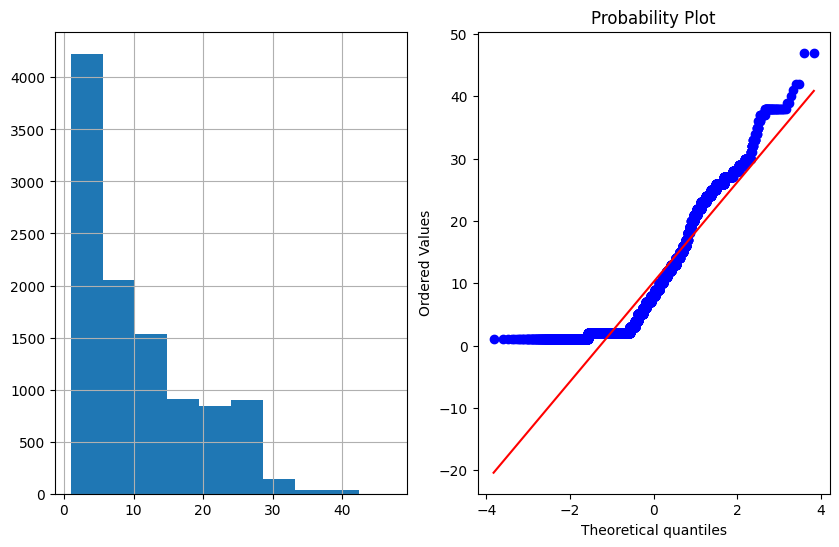

In [68]:
plot_graph_qq(df_train, 'duration_hours')

In [18]:
### it's left skewed so, I will use IQR formula to reduce the outliers from the distribution

In [69]:
Q1 = df_train['duration_hours'].quantile(0.25)
print(Q1)

2.0


In [70]:
Q3 = df_train['duration_hours'].quantile(0.75)
print(Q3)

15.0


In [71]:
print(f"{df_train['duration_hours'].max()} :: {df_train['duration_hours'].min()}")

47 :: 1


In [72]:
IQR = Q3 - Q1
lower_limit = Q1 - 0.5*IQR
upper_limit = Q3 + 0.5*IQR

In [73]:
print(f"{lower_limit} :: {upper_limit}")

-4.5 :: 21.5


In [74]:
lower_limit = 1

In [75]:
print(f"{lower_limit} :: {upper_limit}")

1 :: 21.5


In [76]:
df_train['duration_hours'] =  df_train['duration_hours'].apply(lambda x : upper_limit if x > upper_limit else x)
df_train['duration_hours'] = df_train['duration_hours'].apply(lambda x : lower_limit if x < lower_limit else x)

In [77]:
print(f"{df_train['duration_hours'].max()} :: {df_train['duration_hours'].min()}")

21.5 :: 1.0


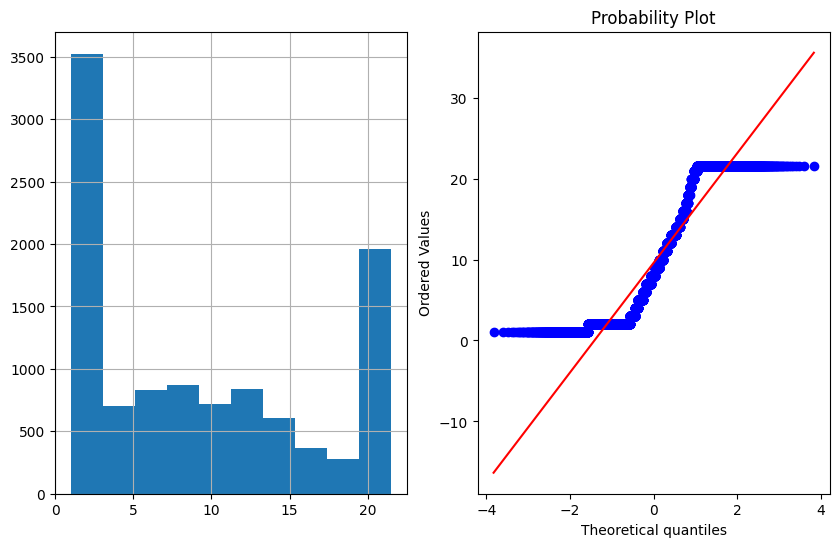

In [78]:
plot_graph_qq(df_train, 'duration_hours')

### => price column

In [88]:
df_train['price'] = df_train['price'].astype(int)

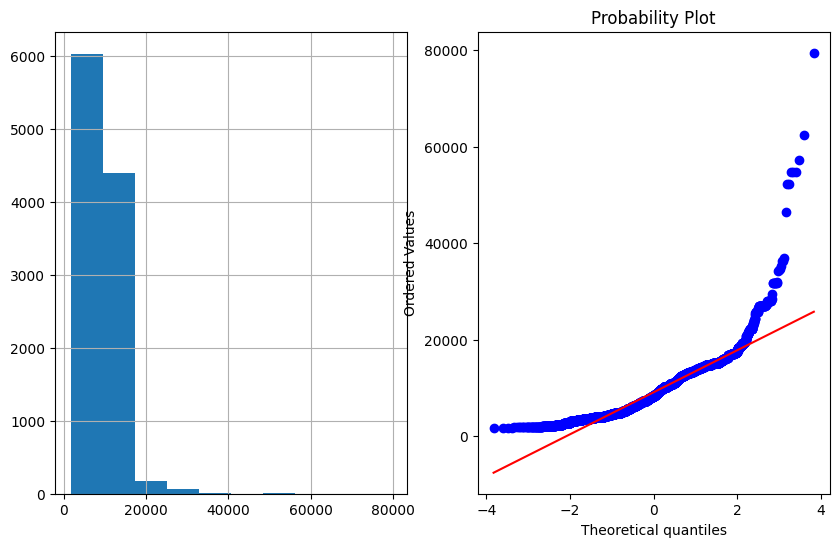

In [89]:
plot_graph_qq(df_train, 'price')

In [90]:
Q1 = df_train['price'].quantile(0.25)
Q3 = df_train['price'].quantile(0.75)
print(f"{Q1} :: {Q3}")

5277.0 :: 12373.0


In [91]:
print(f"{df_train['price'].min()} :: {df_train['price'].max()}")

1759 :: 79512


In [92]:
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [93]:
print(f"{lower_limit} :: {upper_limit}")

-5367.0 :: 23017.0


In [94]:
lower_limit = 1759

In [96]:
df_train['price'] = df_train['price'].apply(lambda x : upper_limit if x > upper_limit else x)
df_train['price'] = df_train['price'].apply(lambda x : lower_limit if x < lower_limit else x)

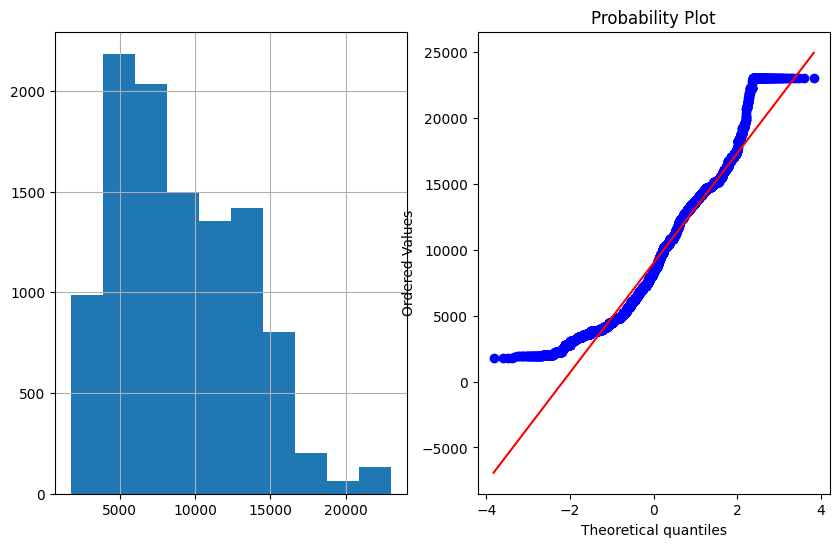

In [99]:
plot_graph_qq(df_train, 'price')

In [98]:
df_train.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2.0,3897.0
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7.0,7662.0
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19.0,13882.0
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5.0,6218.0
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4.0,13302.0


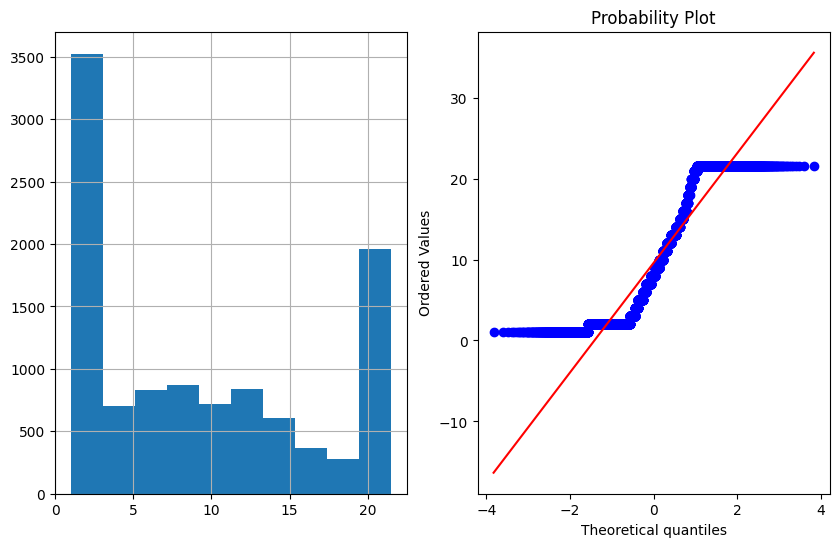

In [100]:
plot_graph_qq(df_train, 'duration_hours')

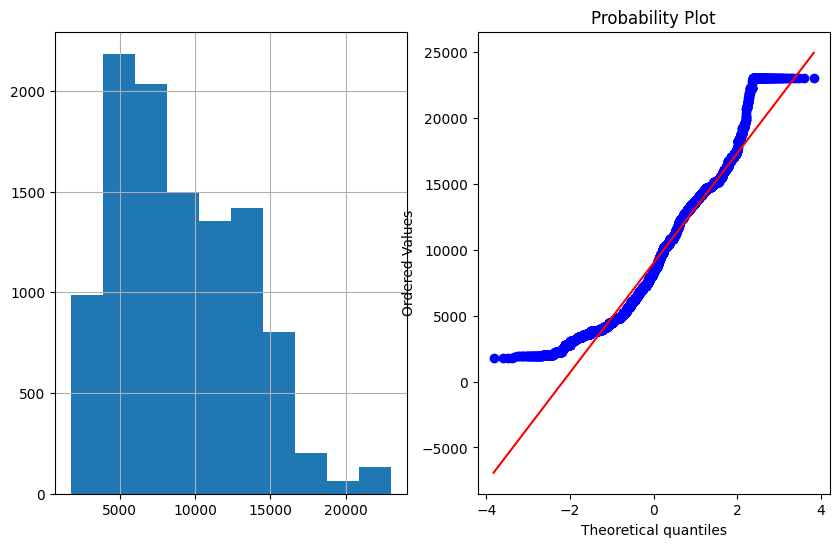

In [101]:
plot_graph_qq(df_train, 'price')

### test data

In [103]:
df_test.drop('Unnamed: 0', axis = 1, inplace = True)

In [104]:
df_test.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,4,4,1.0,0,1,0,1,6,6,2019,17,30,4,25,10
1,3,3,1.0,1,0,0,1,12,5,2019,6,20,10,20,4
2,4,4,1.0,0,1,0,0,21,5,2019,19,15,19,0,23
3,4,4,1.0,0,0,1,1,21,5,2019,8,0,21,0,13
4,2,2,3.0,0,0,1,1,24,6,2019,23,55,2,45,2


### duration hours column

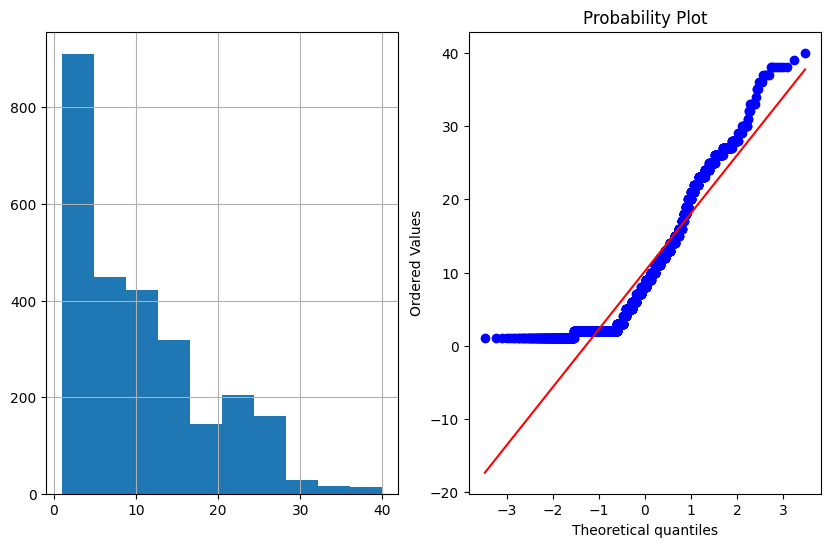

In [105]:
plot_graph_qq(df_test, 'duration_hours')

In [106]:
Q1 = df_test['duration_hours'].quantile(0.25)
Q3 = df_test['duration_hours'].quantile(0.75)
print(f"{Q1} :: {Q3}")

2.0 :: 15.0


In [107]:
print(f"{df_test['duration_hours'].min()} :: {df_test['duration_hours'].max()}")

1 :: 40


In [108]:
IQR = Q3-Q1
lower_limit = 2
upper_limit = Q3 + 1.5 * IQR

In [109]:
print(f"{lower_limit} :: {upper_limit}")

2 :: 34.5


In [110]:
df_test['duration_hours'] = df_test['duration_hours'].apply(lambda x : upper_limit if x > upper_limit else x)
df_test['duration_hours'] = df_test['duration_hours'].apply(lambda x : lower_limit if x < lower_limit else x)

In [111]:
print(f"{df_test['duration_hours'].min()} :: {df_test['duration_hours'].max()}")

2.0 :: 34.5


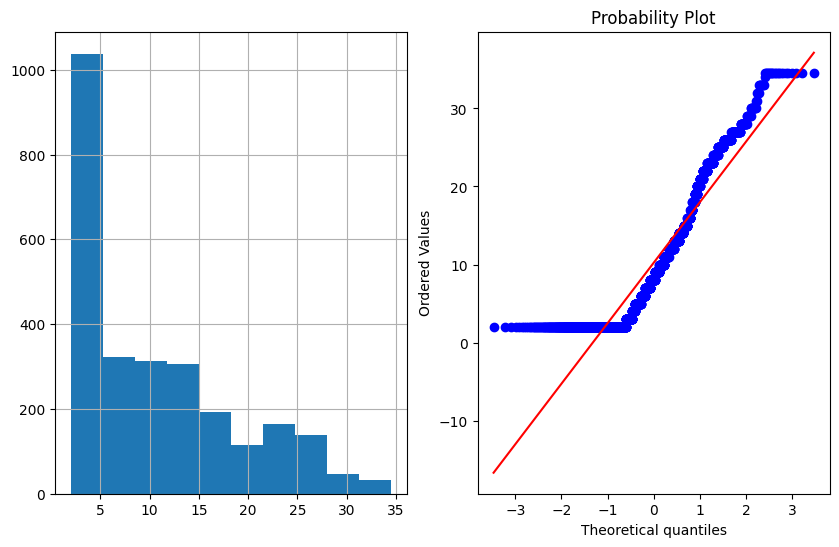

In [112]:
plot_graph_qq(df_test, 'duration_hours')

### saving the datasets

In [113]:
df_test.to_csv('../data/outliers_test.csv')

In [114]:
df_train.to_csv('../data/outliers_train.csv')